# Load and visualize Marmousi dataset

This tutorial describes how to load and visualize the Marmousi dataset: https://wiki.seg.org/wiki/AGL_Elastic_Marmousi#Download.

## Setup ##
1. First, you will need sign in to your Google account. If you're not signed in, you can sign in [here](https://myaccount.google.com/?utm_source=sign_in_no_continue)
2. Next, head on to the [Colab Welcome Page](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true).
3. There, select Github in the top tab and search for https://github.com/thilowrona/seismic_deep_learning/blob/master/tutorial-9/tutorial-9.ipynb
4. Clicking opens this notebook. This is a Jupyter notebook; an awesome combination of code and documentation allowing us work on, describe and share our projects.
5. Before running anything in here, you need to tell Colab that would like to use a GPU (important to train our models quickly). This is done by clicking on the ‘Runtime’ tab, selecting ‘Change runtime type’, changing hardware accelerator to ´GPU´ and clicking ´save´. Excellent! Colab is now set up!
6. When you run the first cell, you will face a pop-up saying ‘Warning: This notebook was not authored by Google’; you should click on ‘Run Anyway’ to get rid of the warning.
7. Next we want to save our notebook. If you click on ‘File’ and then ‘Save’, you will see a pop-up saying ´CANNOT SAVE CHANGES´. Now, click on ‘SAVE A COPY IN DRIVE’. This opens up a new tab with the same file, but this time located in your Drive. If you want to continue working after saving, use the file in the new tab. Your notebook will be saved in a folder called Colab Notebooks in your Google Drive by default.


## Download ##
Now that everything is set up, we need to download the dataset:#


In [1]:
!wget https://s3.amazonaws.com/open.source.geoscience/open_data/elastic-marmousi/elastic-marmousi-model.tar.gz

--2021-03-08 08:48:07--  https://s3.amazonaws.com/open.source.geoscience/open_data/elastic-marmousi/elastic-marmousi-model.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.30
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153722387 (147M) [application/x-gzip]
Saving to: ‘elastic-marmousi-model.tar.gz’

elastic-marmousi-mo 100%[===================>] 146.60M  43.2MB/s    in 3.6s    

2021-03-08 08:48:11 (41.0 MB/s) - ‘elastic-marmousi-model.tar.gz’ saved [153722387/153722387]



Next we unzip it:

In [7]:
!tar xvzf elastic-marmousi-model.tar.gz

elastic-marmousi-model/model/
elastic-marmousi-model/processed_data/SEGY-Time/Kirchhoff_PoSTM_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/SYNTHETIC_time.segy.tar.gz
elastic-marmousi-model/model/LAYER_PROPERTIES.pdf
elastic-marmousi-model/processed_data/SEGY-Depth/SYNTHETIC.segy.tar.gz
elastic-marmousi-model/processed_data/
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PreSDM.segy.tar.gz
elastic-marmousi-model/model/FINAL_HORIZONS.asc
elastic-marmousi-model/model/FINAL_HORIZONS_GX2.asc
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PoSDM.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/NMOstack_SRME_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/Vs.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/NMOstack.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/WE_PreSDM.segy.tar.gz
elastic-marmousi-model/reports/
elastic-marmousi-model/processed_data/SEGY-Time/
elastic-marmousi-model/model/MODEL

as well as all subfolders:

In [12]:
!find . -name '*.tar.gz' -execdir tar -xzvf '{}' \;

elastic-marmousi-model/model/
elastic-marmousi-model/processed_data/SEGY-Time/Kirchhoff_PoSTM_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/SYNTHETIC_time.segy.tar.gz
elastic-marmousi-model/model/LAYER_PROPERTIES.pdf
elastic-marmousi-model/processed_data/SEGY-Depth/SYNTHETIC.segy.tar.gz
elastic-marmousi-model/processed_data/
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PreSDM.segy.tar.gz
elastic-marmousi-model/model/FINAL_HORIZONS.asc
elastic-marmousi-model/model/FINAL_HORIZONS_GX2.asc
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PoSDM.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/NMOstack_SRME_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/Vs.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/NMOstack.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/WE_PreSDM.segy.tar.gz
elastic-marmousi-model/reports/
elastic-marmousi-model/processed_data/SEGY-Time/
elastic-marmousi-model/model/MODEL

## Load ##
Now we want to load the dataset into memory. We do this using the excellent [segysak](https://github.com/trhallam/segysak) package. We install the package like this:

In [14]:
pip install segysak

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 92kB 6.6MB/s 


Import the package:

In [ ]:
import segysak

and load two of the segy files (e.g. the p-wave velocity model):

In [36]:
seismic = segysak.segy.segy_loader('elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PreSDM.segy')
vel_p   = segysak.segy.segy_loader('elastic-marmousi-model/processed_data/SEGY-Depth/Vp.segy')


Loading as 2D



Loading as 2D


and plot them:

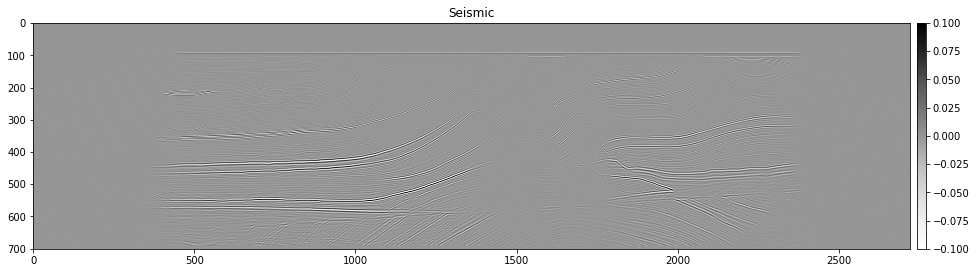

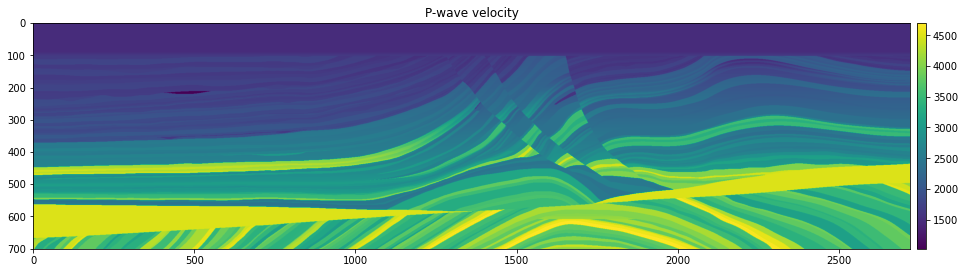

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.figure(figsize=(16,8))
plt.title('Seismic')
ax = plt.gca()
im = ax.imshow(seismic.data.transpose(), vmin=-0.1, vmax=0.1, cmap='Greys')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.show()

plt.figure(figsize=(16,8))
plt.title('P-wave velocity')
ax = plt.gca()
im = ax.imshow(vel_p.data.transpose())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.show()
